In [32]:
import pandas as pd
import json
import time
import datetime
import numpy as np
from urllib.parse import urlparse
import matplotlib.pyplot as plt
%matplotlib notebook
data = pd.read_json("Chrome_Data/Chrome/BrowserHistory.json")

In [42]:
# Function to take in JSON browsing data and return a dataframe of websites and visit times
def main(data):
    df = data_cleaning(data)
    df['dates_and_times'] = df.apply(date_time, axis=1)
    df = index_set(df)
    df['url_short'] = df.apply(url_shortener, axis=1)
    df['page'] = df.apply(main_url_extractor, axis = 1)
    df1 = second_cleaning(df)
    # Reorder columns
    df1 = df1[['page', 'url_short', 'title']]
    return df1

main(data)

,page,url_short,title
2016-01-23 12:03:08,docs.google.com,https://docs.google.com/document/d/1jcpi2wJ_15...,Social innovation challenge - Google Docs
2016-01-23 12:03:53,iversity.org,https://iversity.org/en/courses/social-innovat...,Suspended Tab
2016-01-23 12:04:01,www.wethinq.com,https://www.wethinq.com/en/blog/2014/02/18/32-...,Suspended Tab
2016-01-23 12:04:12,docs.google.com,https://docs.google.com/document/d/1jcpi2wJ_15...,Social innovation challenge - Google Docs
2016-01-23 12:17:22,www.google.com,https://www.google.com/search?q=Array+of+Thing...,Array of Things Project - Google Search
2016-01-23 12:19:56,docs.google.com,https://docs.google.com/document/d/1jcpi2wJ_15...,Social innovation challenge - Google Docs
2016-01-23 12:20:14,www.socialtraders.com.au,http://www.socialtraders.com.au/learn/dsp-land...,Social Traders | Learn About Social Enterprise
2016-01-23 12:20:35,www.socialtraders.com.au,http://www.socialtraders.com.au/learn/dsp-defa...,Social Traders | Social enterprise case studies
2016-01-23 12:21:20,www.reddit.com,https://www.reddit.com/,reddit: the front page of the internet
2016-01-23 12:22:06,www.reddit.com,https://www.reddit.com/r/EngineeringStudents/c...,My lecturer is charging us €15 for the pleasur...


In [ ]:
# Function to plot hourly frequently visited websites with the dataframe of sites and times
def plot_sites(df1):
    # List of every site with no repeats
    sites = df1['page']
    site_count = website_counter(df1)
    site_series = sort_by_least_popular(site_count)

In [33]:
# Function to drop unwanted columns and create a new dataframe, taking in a pandas json data and returning the dataframe 
def data_cleaning(data):
    #drop unneeded columns
    dataframe = data.drop(['client_id', 'favicon_url'], 1)
    #put rows in chronological order
    df = dataframe.sort_values(['time_usec'], ascending=True)
    return df

df = data_cleaning(data)

In [34]:
# Method to convert time to readable format
def date_time(df):
    df['time_usec'] = df['time_usec']/1000000
    return datetime.datetime.fromtimestamp(
        int(df['time_usec'])
        ).strftime('%Y-%m-%d %H:%M:%S')        

df['dates_and_times'] = df.apply(date_time, axis=1)

In [35]:
# Funciton to set the index to the dates and times
def index_set(df):
    df = df.set_index(['dates_and_times'])
    df.index.name=None
    #df = df.drop(['time_usec', 'url'], 1)
    return df

df = index_set(df)

In [36]:
# Function to remove chrome extention prefixes from url's
def url_shortener(df):
    if (df.url[0:3] == 'chr'):
        return df.url[71:]
    else:
        return df.url
       
df['url_short'] = df.apply(url_shortener, axis=1)

In [37]:
# Function to create a column with the main root url
def main_url_extractor(df):
    u = urlparse(df['url_short'])
    return u.netloc
    
df['page'] = df.apply(main_url_extractor, axis = 1)

In [38]:
# Function to make a copy of the dataframe and drop some more columns
def second_cleaning(df):
    #df = df.set_index(['dates_and_times'])
    #df.index.name=None
    #make a copy of the dataframe and drop unneccesary columns
    df1 = pd.DataFrame.copy(df)
    df1 = df1.drop(['time_usec', 'url', 'page_transition'], 1)
    return df1

df1 = second_cleaning(df)

In [39]:
# Reorder columns of the dataframe
df1 = df1[['page', 'url_short', 'title']]

In [40]:
# Function to get a list of every site with no repeats
sites = df1['page']

In [41]:
df1

,page,url_short,title
2016-01-23 12:03:08,docs.google.com,https://docs.google.com/document/d/1jcpi2wJ_15...,Social innovation challenge - Google Docs
2016-01-23 12:03:53,iversity.org,https://iversity.org/en/courses/social-innovat...,Suspended Tab
2016-01-23 12:04:01,www.wethinq.com,https://www.wethinq.com/en/blog/2014/02/18/32-...,Suspended Tab
2016-01-23 12:04:12,docs.google.com,https://docs.google.com/document/d/1jcpi2wJ_15...,Social innovation challenge - Google Docs
2016-01-23 12:17:22,www.google.com,https://www.google.com/search?q=Array+of+Thing...,Array of Things Project - Google Search
2016-01-23 12:19:56,docs.google.com,https://docs.google.com/document/d/1jcpi2wJ_15...,Social innovation challenge - Google Docs
2016-01-23 12:20:14,www.socialtraders.com.au,http://www.socialtraders.com.au/learn/dsp-land...,Social Traders | Learn About Social Enterprise
2016-01-23 12:20:35,www.socialtraders.com.au,http://www.socialtraders.com.au/learn/dsp-defa...,Social Traders | Social enterprise case studies
2016-01-23 12:21:20,www.reddit.com,https://www.reddit.com/,reddit: the front page of the internet
2016-01-23 12:22:06,www.reddit.com,https://www.reddit.com/r/EngineeringStudents/c...,My lecturer is charging us €15 for the pleasur...


In [17]:
# Make a dictionary, site_count, of sites and how many times I visited
def website_counter(df1):
    site_count = {} 
    for site in sites:
    # Special case if we're seeing this word for the first time.
        if not site in site_count:
            site_count[site] = 1
        else:
            site_count[site] = site_count[site] + 1
    return site_count

site_count = website_counter(df1)
#site_count

In [18]:
# Funciton that sorts websites from least to most visited as measured by page visits
def sort_by_least_popular(site_count):
    site_count = pd.Series(site_count)
    site_count = pd.Series.sort_values(site_count)
    return site_count

site_series = sort_by_least_popular(site_count)
#display the 20 most visited sites
#site_series[-20:]

In [19]:
# Function to plot the top 20 sites
def plot_top_sites():
    fig, ax = plt.subplots()
    pos = np.arange(20)+.5    # the bar centers on the y axis
    ax.barh(pos, site_series[-20:].values, align='center', fc='#80d0f1', ec='w')
    ax.set_xlabel("Site Visits Between January and November 2016")
    ax.set_yticks(pos)
    k = site_series[-20:].index
    ax.set_yticklabels(k)
    ax.set_title("Top Sites")
    return plt.tight_layout()

#plot_top_sites()

In [20]:
# Function that creates a Series of hour and clicks
def clicks_by_hour(df):
    hours = np.arange(24)
    clicks = np.zeros((24,), dtype=np.int)
    clicks_per_hour = pd.Series(clicks, hours)
    return clicks_per_hour

clicks_per_hour = clicks_by_hour(df)
print(type(clicks_per_hour))

<class 'pandas.core.series.Series'>


In [21]:
#Function that creates a dictionary of hour and clicks
def clicks_by_hour_dict(df):
    hours = np.arange(24)
    clicks = np.zeros((24,), dtype=np.int)
    dictionary = dict(zip(hours, clicks))
    return dictionary

clicks_per_hour_dict = clicks_by_hour_dict(df)
print(type(clicks_per_hour_dict))

<class 'dict'>


In [25]:
# Function that creates a new column with the hour of day
def hour(df1):
    return df1.index.str[11:13]

a = hour(df)
df['hour'] = a

In [26]:
# Function that counts instances of each page per hour
def hour_int_list(df, clicks_per_hour):
    hour = list(map(int, df['hour']))
    return(hour)


hour_click = hour_int_list(df, clicks_per_hour)

<IPython.core.display.Javascript object>


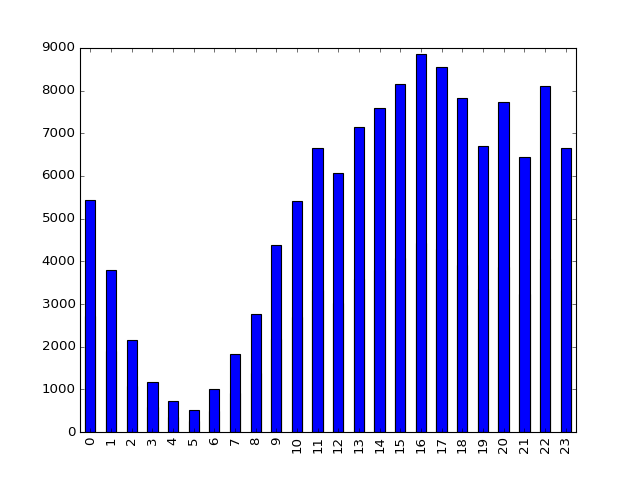

In [27]:
# Funciton to create a dictionary with the number of aggregate clicks through the day
def cph(clicks_per_hour, hour_click):
    for item in hour_click:
        clicks_per_hour[item] = clicks_per_hour[item] + 1
    return clicks_per_hour

hr_clicks = cph(clicks_per_hour, hour_click)

hr_clicks.plot(kind='bar', rot=90)

In [ ]:
# Function that checks the day to create a day

In [ ]:
# Function that counts up the views to productive pages 
# take the day column of the year above, turn it into the key as an integer 
#augment the day_clicks[day] = day+clicks[day] + 1
#for the 
# return the dictionary of days and views

#apply(function, axis)

In [ ]:
#clicks_per_hour.apply(hour_clicks, df.hour)
#df['waves'] = df.apply(hour_clicks)

#hour_clicks(clicks_per_hour, df)

In [ ]:
clicks_per_hour

In [28]:
#clicks_per_hour = 0
def cph(clicks_per_hour, hour_click):
    for item in hour_click:
        clicks_per_hour[item] = clicks_per_hour[item] + 1
    return clicks_per_hour

hr_clicks = cph(clicks_per_hour, hour_click)
hr_clicks

hr_clicks.plot(kind='bar')

In [49]:
# Function to calculate clicks per hour, the long way
def clicky_hour(df, clicks_per_hour):
    for i in range (0, (len(df)-1) ):
        b = df['hour'].iloc[i]
        c = int(b)
        #hour = df.hour.loc[i] 
        clicks_per_hour[c] = clicks_per_hour[c] + 1
    return clicks_per_hour

clicky_hour(df, clicks_per_hour)

KeyError: 'hour'

In [ ]:
df.iloc[0]

In [48]:
fig, ax = plt.subplots()
clicks = [[]]
#val = 3+10*rand(5) 
def click_method(site_series, clicks):
    for i in range(2740, 2776):
        clicks.append(site_series[i])
    return clicks
clicks = site_series.apply(click_method, clicks)
ax.barh(bar_lengths, 200)
fig.show()
#fig = site_series[-20:].plot(kind="barh", fontsize=10)

<IPython.core.display.Javascript object>

TypeError: click_method() missing 1 required positional argument: 'clicks'

In [ ]:
# Function to get a list of every site with no repeats
#sites = df['page']
"""
def unique_urls(df):
    sites_unique = set(sites)
    return sites_unique

site_list = unique_urls(df)
print(type(site_list))
print(type(sites))
"""